Base de Dados: https://www.tesourotransparente.gov.br/ckan/dataset

In [9]:
import pandas as pd
import yfinance as yf
import cufflinks as cf
cf.go_offline()
from plotly.subplots import make_subplots

# pd.set_option("display.max_colwidth", 150)
# pd.set_option("display.min_rows", 20)

import matplotlib
# matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)
import plotly.express as px

import plotly.graph_objects as go

# import plotly.io as pio
# pio.renderers.default = 'png'  ## comentar se quiser grafico interativo

In [10]:
def busca_titulos(tipo=None):
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  if tipo is None:
    return df.sort_index()
  else:
      return df[df.index.get_level_values(0) == tipo]

busca por tipo

In [11]:
busca_titulos('Tesouro Selic')

Taxa Compra Manha  Taxa Venda Manha  \
Tipo Titulo   Data Vencimento Data Base                                         
Tesouro Selic 2008-06-18      2005-12-16               0.07              0.10   
              2007-01-17      2005-12-16               0.01              0.03   
              2006-01-18      2005-12-16              -0.02              0.00   
              2010-03-17      2005-12-16               0.23              0.27   
              2009-03-18      2005-12-16               0.11              0.15   
...                                                     ...               ...   
                              2005-07-25               0.32              0.36   
              2006-01-18      2005-07-22               0.06              0.07   
              2007-01-17      2005-07-22               0.11              0.13   
              2008-06-18      2005-07-22               0.22              0.25   
              2009-03-18      2005-07-22               0.32              0.36   

                                          PU Compra Manha  PU Venda Manha  \
Tipo Titulo   Data Vencimento Data Base                                     
Tesouro Selic 2008-06-18      2005-12-16          2553.49         2551.60   
              2007-01-17      2005-12-16          2557.63         2557.09   
              2006-01-18      2005-12-16          2557.95         2557.91   
              2010-03-17      2005-12-16          2533.24         2528.98   
              2009-03-18      2005-12-16          2548.84         2545.56   
...                                                   ...             ...   
                              2005-07-25          2357.60         2354.19   
              2006-01-18      2005-07-22          2382.67         2382.56   
              2007-01-17      2005-07-22          2379.52         2378.82   
              2008-06-18      2005-07-22          2368.37         2366.34   
              2009-03-18      2005-07-22          2355.88         2352.48   

                                          PU Base Manha  
Tipo Titulo   Data Vencimento Data Base                  
Tesouro Selic 2008-06-18      2005-12-16        2549.91  
              2007-01-17      2005-12-16        2555.41  
              2006-01-18      2005-12-16        2556.23  
              2010-03-17      2005-12-16        2527.29  
              2009-03-18      2005-12-16        2543.87  
...                                                 ...  
                              2005-07-25        2352.47  
              2006-01-18      2005-07-22        2380.85  
              2007-01-17      2005-07-22        2377.11  
              2008-06-18      2005-07-22        2364.62  
              2009-03-18      2005-07-22        2350.76  

[20203 rows x 5 columns]

busca todos

In [12]:
titulos = busca_titulos()
titulos

Taxa Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                       
Tesouro Educa+ 2030-12-15      2023-08-01               5.06   
                               2023-08-02               5.05   
                               2023-08-03               5.02   
                               2023-08-04               5.02   
                               2023-08-07               4.98   
...                                                      ...   
Tesouro Selic  2031-03-01      2025-08-20               0.10   
                               2025-08-21               0.11   
                               2025-08-22               0.11   
                               2025-08-25               0.11   
                               2025-08-26               0.11   

                                           Taxa Venda Manha  PU Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                                       
Tesouro Educa+ 2030-12-15      2023-08-01              5.18          3248.87   
                               2023-08-02              5.17          3251.07   
                               2023-08-03              5.14          3256.24   
                               2023-08-04              5.14          3257.13   
                               2023-08-07              5.10          3263.78   
...                                                     ...              ...   
Tesouro Selic  2031-03-01      2025-08-20              0.11         17093.03   
                               2025-08-21              0.12         17102.33   
                               2025-08-22              0.12         17111.93   
                               2025-08-25              0.12         17121.43   
                               2025-08-26              0.12         17130.75   

                                           PU Venda Manha  PU Base Manha  
Tipo Titulo    Data Vencimento Data Base                                  
Tesouro Educa+ 2030-12-15      2023-08-01         3230.41        3230.41  
                               2023-08-02         3232.62        3232.62  
                               2023-08-03         3237.76        3237.76  
                               2023-08-04         3238.49        3238.49  
                               2023-08-07         3245.29        3245.29  
...                                                   ...            ...  
Tesouro Selic  2031-03-01      2025-08-20        17074.12       17074.12  
                               2025-08-21        17083.43       17083.43  
                               2025-08-22        17093.02       17093.02  
                               2025-08-25        17102.51       17102.51  
                               2025-08-26        17111.83       17111.83  

[160697 rows x 5 columns]

tipos

In [13]:
titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()

['Tesouro Educa+',
 'Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Renda+ Aposentadoria Extra',
 'Tesouro Selic']

In [36]:
busca_titulos('Tesouro IPCA+ com Juros Semestrais')

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro IPCA+ com Juros Semestrais 2045-05-15      2005-12-19               9.05   
                                   2024-08-15      2005-12-19               8.99   
                                   2008-08-15      2005-12-19              11.30   
                                   2009-05-15      2005-12-19              11.09   
                                   2015-05-15      2005-12-19               8.93   
...                                                                          ...   
                                   2024-08-15      2005-07-22               8.95   
                                   2015-05-15      2005-07-22               8.94   
                                   2045-05-15      2005-07-22               9.10   
                                   2006-08-15      2005-07-22              12.77   
                                   2007-05-15      2005-07-22              12.12   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro IPCA+ com Juros Semestrais 2045-05-15      2005-12-19              9.15   
                                   2024-08-15      2005-12-19              9.07   
                                   2008-08-15      2005-12-19             11.34   
                                   2009-05-15      2005-12-19             11.13   
                                   2015-05-15      2005-12-19              8.99   
...                                                                         ...   
                                   2024-08-15      2005-07-22              9.03   
                                   2015-05-15      2005-07-22              9.00   
                                   2045-05-15      2005-07-22              9.20   
                                   2006-08-15      2005-07-22             12.79   
                                   2007-05-15      2005-07-22             12.14   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro IPCA+ com Juros Semestrais 2045-05-15      2005-12-19          1075.56   
                                   2024-08-15      2005-12-19          1190.91   
                                   2008-08-15      2005-12-19          1420.84   
                                   2009-05-15      2005-12-19          1364.12   
                                   2015-05-15      2005-12-19          1297.63   
...                                                                        ...   
                                   2024-08-15      2005-07-22          1176.90   
                                   2015-05-15      2005-07-22          1272.09   
                                   2045-05-15      2005-07-22          1056.53   
                                   2006-08-15      2005-07-22          1479.19   
                                   2007-05-15      2005-07-22          1411.76   

                                                               PU Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                    
Tesouro IPCA+ com Juros Semestrais 2045-05-15      2005-12-19         1064.09   
                                   2024-08-15      2005-12-19         1182.22   
                                   2008-08-15      2005-12-19         1419.61   
                                   2009-05-15      2005-12-19         1362.61   
                                   2015-05-15      2005-12-19         1292.62   
...                                                                       ...   
                                   2024-08-15      2005-07-22         1168.28   
                                   2015-05-15      2005-07-22         1267.07   
             

historico das taxas do tesouro  IPCA+ com Juros Semestrai 2035

In [14]:
titulos.loc[('Tesouro IPCA+ com Juros Semestrais','2035-01-01'):('Tesouro IPCA+ com Juros Semestrais','2035-12-30')]

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12               8.04   
                                                   2006-04-13               8.05   
                                                   2006-04-17               8.09   
                                                   2006-04-18               8.10   
                                                   2006-04-19               8.09   
...                                                                          ...   
                                                   2025-08-20               7.49   
                                                   2025-08-21               7.58   
                                                   2025-08-22               7.56   
                                                   2025-08-25               7.51   
                                                   2025-08-26               7.54   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12              8.14   
                                                   2006-04-13              8.15   
                                                   2006-04-17              8.19   
                                                   2006-04-18              8.20   
                                                   2006-04-19              8.19   
...                                                                         ...   
                                                   2025-08-20              7.61   
                                                   2025-08-21              7.70   
                                                   2025-08-22              7.68   
                                                   2025-08-25              7.63   
                                                   2025-08-26              7.66   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12          1279.73   
                                                   2006-04-13          1279.30   
                                                   2006-04-17          1274.17   
                                                   2006-04-18          1273.27   
                                                   2006-04-19          1275.19   
...                                                                        ...   
                                                   2025-08-20          4176.10   
                                                   2025-08-21          4151.96   
                                                   2025-08-22          4158.26   
                                                   2025-08-25          4173.28   
                                                   2025-08-26          4165.92   

                                                               PU Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                    
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12         1265.68   
                                                   2006-04-13         1265.27   
                                                   2006-04-17         1260.24   
                                                   2006-04-18         1259.37   
                                                   2006-04-19         1261.26   
...                                                                       ...   
                                                   2025-08-20         4141.52   
                                                   2025-08-21         4117.66   
             

In [15]:
hist = titulos.loc[('Tesouro IPCA+ com Juros Semestrais','2035-01-01'):('Tesouro IPCA+ com Juros Semestrais','2035-12-30')].reset_index(level=[0, 1], drop=True)
hist

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2006-04-12,8.04,8.14,1279.73,1265.68,1265.11
2006-04-13,8.05,8.15,1279.30,1265.27,1264.40
2006-04-17,8.09,8.19,1274.17,1260.24,1259.73
2006-04-18,8.10,8.20,1273.27,1259.37,1258.86
2006-04-19,8.09,8.19,1275.19,1261.26,1260.75
...,...,...,...,...,...
2025-08-20,7.49,7.61,4176.10,4141.52,4141.52
2025-08-21,7.58,7.70,4151.96,4117.66,4117.66
2025-08-22,7.56,7.68,4158.26,4124.23,4124.23


In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=hist.index , y=hist['Taxa Compra Manha']))
fig.update_layout(
    title="Historico da taxa",
    xaxis_title="Ano",
    yaxis_title="Taxa compra",
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=100, b=100),
    paper_bgcolor="LightYellow"
)
fig.show()

Vendas de titulos do tesouro

In [17]:
def vendas_tesouro(tipo=None):
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  df.sort_index(inplace=True)
  if tipo is None:
    return df
  else:
    return df[df.index.get_level_values(0) == tipo]


In [18]:
vendas = vendas_tesouro()
vendas


PU  Quantidade  \
Tipo Titulo    Vencimento do Titulo Data Venda                             
Tesouro Educa+ 2030-12-15           2023-08-02   3248.250572      331.84   
                                    2023-08-03   3250.646532      183.44   
                                    2023-08-04   3260.006540      157.49   
                                    2023-08-07   3260.737100      360.67   
                                    2023-08-08   3263.770709      227.79   
...                                                      ...         ...   
Tesouro Selic  2031-03-01           2025-08-19  17073.937260     5511.17   
                                    2025-08-20  17083.533638     5113.89   
                                    2025-08-21  17093.025596     4871.29   
                                    2025-08-22  17102.320962     4419.21   
                                    2025-08-25  17111.921635     4877.57   

                                                      Valor  
Tipo Titulo    Vencimento do Titulo Data Venda               
Tesouro Educa+ 2030-12-15           2023-08-02   1077899.46  
                                    2023-08-03    596298.59  
                                    2023-08-04    513418.42  
                                    2023-08-07   1176050.04  
                                    2023-08-08    743454.32  
...                                                     ...  
Tesouro Selic  2031-03-01           2025-08-19  94097370.80  
                                    2025-08-20  87363311.83  
                                    2025-08-21  83265084.65  
                                    2025-08-22  75578747.81  
                                    2025-08-25  83464595.60  

[90870 rows x 3 columns]

In [19]:
selic= vendas_tesouro('Tesouro Selic').reset_index(level=[0, 1], drop=True)

In [20]:
selic

,PU,Quantidade,Valor
Data Venda,,,
2002-01-07,1263.007692,2.60,3283.81
2002-01-08,1263.900000,7.60,9605.64
2002-01-09,1264.790000,6.00,7588.74
2002-01-11,1266.821052,3.80,4813.91
2002-01-14,1267.707500,4.00,5070.83
...,...,...,...
2025-08-19,17073.937260,5511.17,94097370.80
2025-08-20,17083.533638,5113.89,87363311.83
2025-08-21,17093.025596,4871.29,83265084.65


In [21]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("PU", "Valor" , 'Quantidade'))

# Adicionando os traces aos subplots
fig.add_trace(go.Scatter(x=selic.index, y=selic['PU'], mode='lines', name='Dados 1'), row=1, col=1)
fig.add_trace(go.Scatter(x=selic.index, y=selic['Quantidade'], mode='lines', name='Dados 2'), row=2, col=1)
fig.add_trace(go.Scatter(x=selic.index, y=selic['Valor'], mode='lines', name='Dados 2'), row=3, col=1)

# Configurando o layout
fig.update_layout(title="Vendas do Tesouro Selic", showlegend=False)



<Axes: xlabel='Data Venda'>

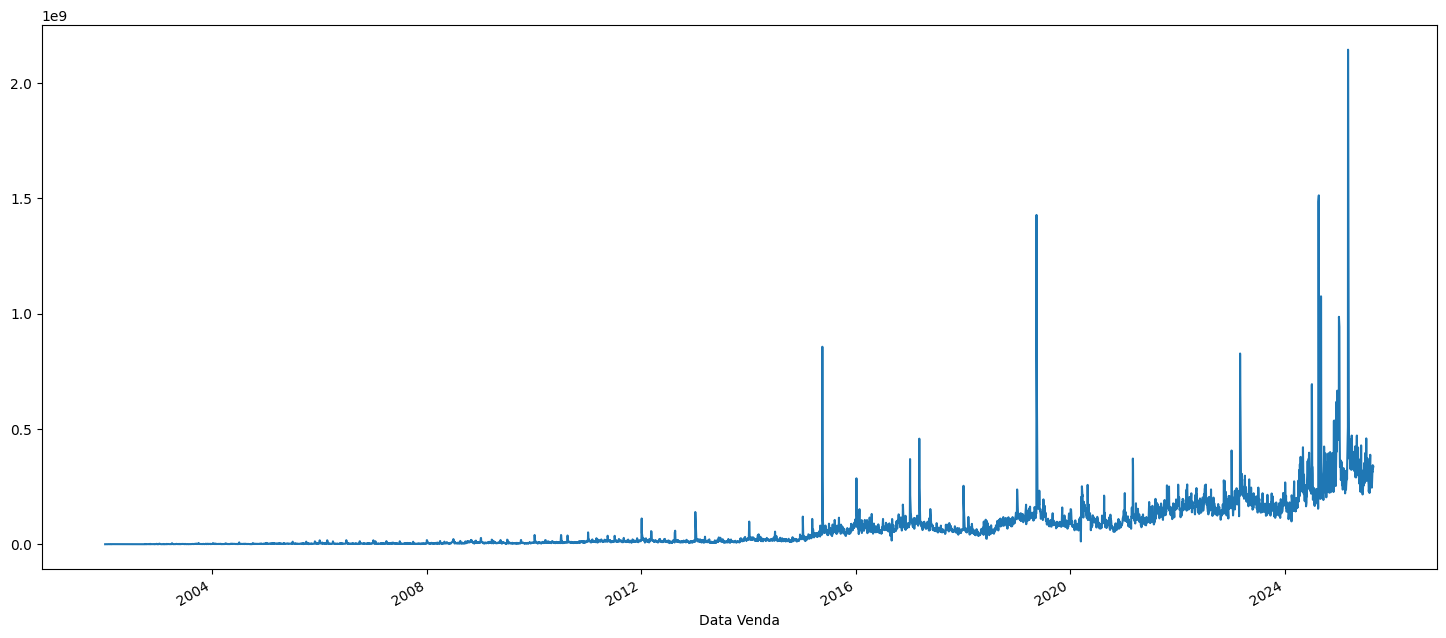

In [23]:
vendas['Valor'].groupby('Data Venda').sum().plot()

recompra -- títulos resgatados antes do vencimento

In [25]:
def recompras():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :2])
  df = df.set_index(multi_indice).iloc[: , 2:]  
  return df.sort_index()

In [26]:
resgate = recompras()
resgate

Data Resgate  Quantidade        Valor
Tipo Titulo    Vencimento do Titulo                                      
Tesouro Educa+ 2030-12-15             2025-05-08       39.59    141633.97
               2030-12-15             2025-05-26      111.33    400546.52
               2030-12-15             2025-04-04       98.68    346602.30
               2030-12-15             2025-04-23      107.98    382311.00
               2030-12-15             2025-04-28      173.51    618308.82
...                                          ...         ...          ...
Tesouro Selic  2031-03-01             2025-08-12     1789.84  30456498.24
               2031-03-01             2025-08-13     1509.93  25708317.53
               2031-03-01             2025-07-30     1311.41  22203596.34
               2031-03-01             2025-07-31     1353.87  22934838.17
               2031-03-01             2025-08-14     1519.22  25881144.32

[86075 rows x 3 columns]

In [27]:
selic = resgate.loc['Tesouro Selic']
selic

,Data Resgate,Quantidade,Valor
Vencimento do Titulo,,,
2005-02-16,2005-02-03,20.60,45229.97
2005-02-16,2005-02-10,24.00,52800.48
2005-02-16,2005-01-06,10.60,22969.46
2005-02-16,2005-01-07,19.60,42499.46
2005-02-16,2005-01-13,128.40,279139.02
...,...,...,...
2031-03-01,2025-08-12,1789.84,30456498.24
2031-03-01,2025-08-13,1509.93,25708317.53
2031-03-01,2025-07-30,1311.41,22203596.34


<Axes: xlabel='Data Resgate'>

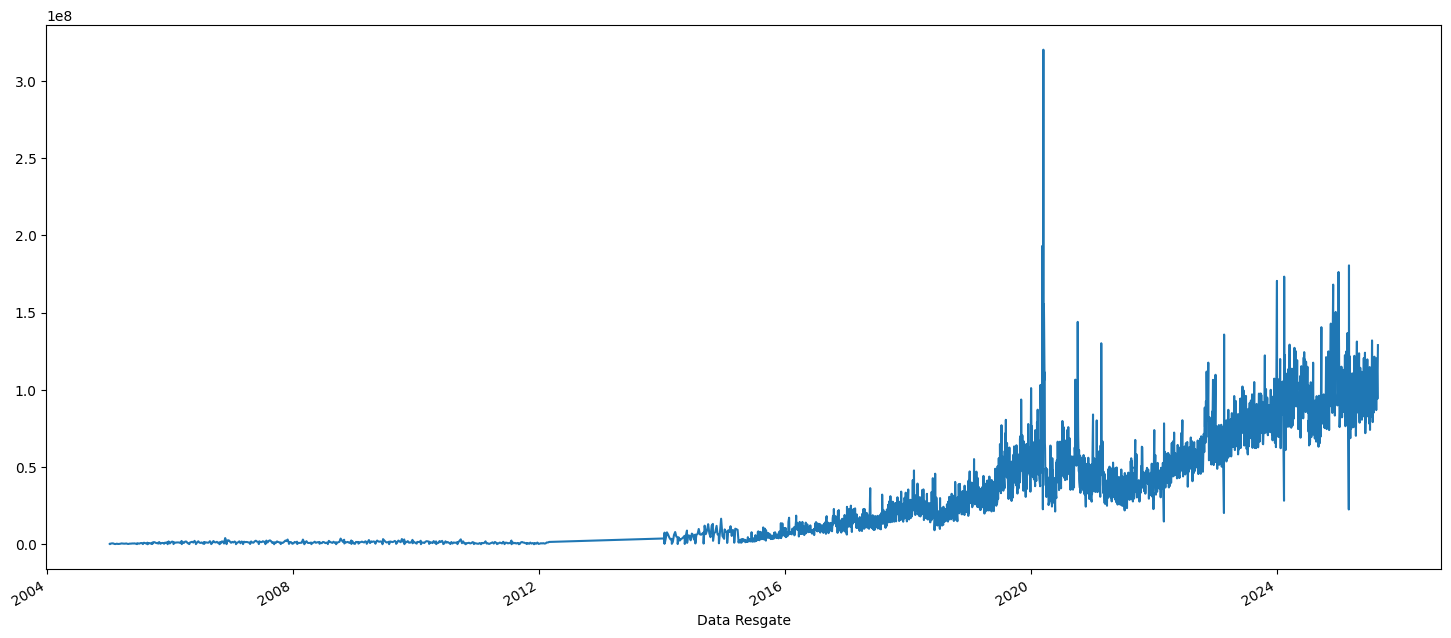

In [29]:
selic.groupby('Data Resgate').sum().Valor.plot()

Venda semanal Tesouro Selic X retorno Ibov

In [30]:
selic_semanal = selic.reset_index(level=[0], drop=True)
selic_semanal.set_index('Data Resgate', inplace=True)
selic_semanal = selic_semanal.resample('W').sum()
selic_semanal

,Quantidade,Valor
Data Resgate,,
2005-01-09,109.40,2.363506e+05
2005-01-16,203.40,4.414528e+05
2005-01-23,263.60,5.713181e+05
2005-01-30,238.80,5.209024e+05
2005-02-06,83.00,1.814714e+05
...,...,...
2025-08-03,28429.71,4.830402e+08
2025-08-10,29674.26,5.055222e+08
2025-08-17,29769.32,5.085253e+08


In [32]:
ibov = yf.download('^BVSP')['Close'].resample('W').last().pct_change()[1:]

/tmp/ipykernel_26057/91363168.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [33]:
selic_ibov = pd.concat([selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']
selic_ibov

,Recompra(%),IBOV(%)
2025-08-17,0.005941,0.003149
2025-08-24,0.052236,0.011933
2025-08-31,-0.758998,0.003489


In [34]:
selic_ibov = selic_ibov[selic_ibov.index >'2022']

fig = go.Figure()
fig.add_trace(go.Scatter(name='Recompras(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)'],marker=dict(color='blue')))
fig.add_trace(go.Scatter(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)'],marker=dict(color='red')))
fig.update_layout(barmode='group')
fig.show()
     

In [35]:

fig = go.Figure()
fig.add_trace(go.Bar(name='Recompras(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)'],marker=dict(color='blue')))
fig.add_trace(go.Bar(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)'],marker=dict(color='red')))
fig.update_layout(barmode='group')
fig.show()
     